In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import processors
import matplotlib.pyplot as plt

In [2]:
raw_covid_df = processors.load_data("../data/us-counties.csv")

In [3]:
by_date_state_df = processors.aggregate_covid_cases_by_group(None, ["date", "state"], raw_covid_df, "cases")

In [4]:
by_date_state_df

date          state   cases                          
                                     sum         mean  min     max
0      2020-01-21     Washington       1     1.000000    1       1
1      2020-01-22     Washington       1     1.000000    1       1
2      2020-01-23     Washington       1     1.000000    1       1
3      2020-01-24       Illinois       1     1.000000    1       1
4      2020-01-24     Washington       1     1.000000    1       1
...           ...            ...     ...          ...  ...     ...
19644  2021-02-22       Virginia  565270  4250.150376   90   65317
19645  2021-02-22     Washington  338309  8674.589744   85   83073
19646  2021-02-22  West Virginia  129854  2360.981818  222   11891
19647  2021-02-22      Wisconsin  612713  8509.902778  466  106397
19648  2021-02-22        Wyoming   53900  2343.478261  148    8135

[19649 rows x 6 columns]

In [5]:
nh_data = by_date_state_df[by_date_state_df["state"] == "New Hampshire"]

In [6]:
nh_data["new_cases"] = nh_data["cases","sum"] - nh_data["cases","sum"].shift(1)

<ipython-input-6-1e8b38e833bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nh_data["new_cases"] = nh_data["cases","sum"] - nh_data["cases","sum"].shift(1)


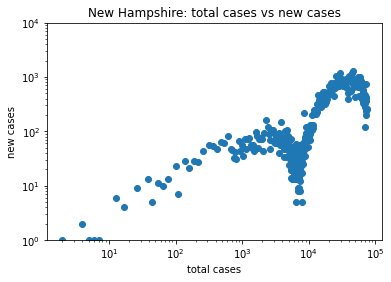

In [7]:
plt.figure(1)
plt.scatter(nh_data["cases","sum"], nh_data["new_cases"])
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1e4))
plt.xlabel("total cases")
plt.ylabel("new cases")
plt.title("New Hampshire: total cases vs new cases")
plt.show()

In [8]:
nh_raw_df = raw_covid_df[raw_covid_df["state"] == "New Hampshire"]

In [9]:
nh_by_county = processors.aggregate_covid_cases_by_group(None, ["county"], nh_raw_df, "cases")

In [10]:
nh_by_county

county    cases                        
                      sum         mean min    max
0        Belknap   215867   631.190058   2   3056
1        Carroll   116259   337.962209   1   1653
2       Cheshire   168109   494.438235   1   2568
3           Coos    79082   242.582822   1   1280
4        Grafton   157143   438.946927   1   2496
5   Hillsborough  2584248  7490.573913   1  28018
6      Merrimack   572335  1673.494152   1   7316
7     Rockingham  1483014  4201.172805   1  18072
8      Strafford   467241  1378.292035   1   6836
9       Sullivan    73930   218.727811   1   1305
10       Unknown    80227   276.644828   0   1132

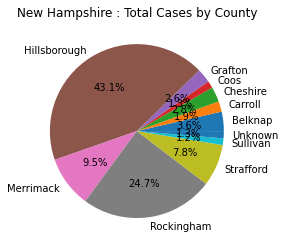

In [11]:
plt.figure(2)
plt.pie(nh_by_county["cases"]["sum"], labels=nh_by_county["county"], autopct="%1.1f%%")
plt.title("New Hampshire : Total Cases by County")
plt.show()

In [12]:
state_total_df = raw_covid_df[raw_covid_df["date"] == "2020-12-31"]
state_total_df_agg_over_county = processors.aggregate_covid_cases_by_group(None, ["state"], state_total_df, "cases")
state_total_df_agg_over_county.set_index("state")

cases                             
                              sum          mean    min     max
state                                                         
Alabama                    361226   5391.432836    490   52339
Alaska                      46740   1669.285714     16   22820
Arizona                    523829  34921.933333    400  322449
Arkansas                   225138   2962.342105    234   24662
California                2307769  39789.120690     24  770915
Colorado                   335579   5243.421875     13   47711
Connecticut                185708  20634.222222    665   56288
Delaware                    57456  14364.000000    136   33211
District of Columbia        28983  28983.000000  28983   28983
Florida                   1323307  19460.397059    750  298872
Georgia                    644065   4025.406250     54   57528
Guam                         8286   8286.000000   8286    8286
Hawaii                      21459   4291.800000      1   18034
Idaho                      141388   3213.363636     53   38417
Illinois                   965840   9469.019608    196  393652
Indiana                    514455   5591.902174    396   70801
Iowa                       281712   2817.120000    266   41499
Kansas                     225455   2126.933962      0   39423
Kentucky                   268828   2240.233333    138   52277
Louisiana                  315275   4850.384615    273   31498
Maine                       24201   1423.588235      1    7233
Maryland                   276834  11073.360000      0   54614
Massachusetts              375178  25011.866667    483   75615
Michigan                   527199   6276.178571     82   84967
Minnesota                  415361   4720.011364    104   86273
Mississippi                215811   2631.841463    152   14714
Missouri                   418637   3578.094017    119   69480
Montana                     81701   1458.946429     10   13847
Nebraska                   167795   1804.247312     16   53284
Nevada                     225178  13245.764706     29  170032
New Hampshire               44028   4002.545455    430   17624
New Jersey                 479381  21790.045455   1057   47442
New Mexico                 142897   4330.212121      8   40808
New York                   979040  16880.000000    102  430863
North Carolina             541070   5410.700000    169   63088
North Dakota                92502   1713.000000      7   19866
Northern Mariana Islands      122     61.000000      2     120
Ohio                       700380   7958.863636    513   84050
Oklahoma                   290936   3729.948718    107   57993
Oregon                     113929   3164.694444     17   25290
Pennsylvania               646060   9642.686567    146   93885
Puerto Rico                109906   1391.215190     28   15250
Rhode Island                87949  14658.166667   2403   58946
South Carolina             307507   6684.934783    473   37327
South Dakota                99164   1502.484848     67   24977
Tennessee                  572579   5964.364583    324   68812
Texas                     1772163   6977.019685      1  237727
Utah                       276612   9220.400000     18  107386
Vermont                      7412    494.133333      9    2658
Virgin Islands               2031    677.000000    174    1028
Virginia                   349584   2628.451128     57   43977
Washington                 251064   6437.538462     48   62582
West Virginia               85334   1551.527273    130    8582
Wisconsin                  520438   7228.305556    421   91624
Wyoming                     44409   1930.826087    140    7045

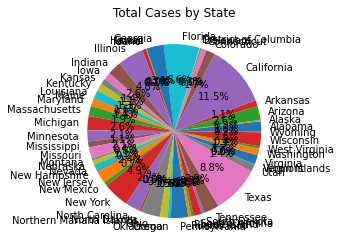

In [13]:
plt.figure(3)
plt.pie(state_total_df_agg_over_county["cases","sum"], labels=state_total_df_agg_over_county["state"], autopct="%1.1f%%")
plt.title("Total Cases by State")
plt.show()

In [14]:
population_df = processors.load_data("../data/census_population_only_estimates_2019.csv")
population_df_agg = processors.aggregate_covid_cases_by_group(None, ["STNAME"], population_df, "POPESTIMATE2019")

In [15]:
population_df_agg.set_index("STNAME")

POPESTIMATE2019                                
                                 sum          mean     min       max
STNAME                                                              
Alabama                      9806370  1.442113e+05    8111   4903185
Alaska                       1463090  4.876967e+04     579    731545
Arizona                     14557434  9.098396e+05    9498   7278717
Arkansas                     6035608  7.941589e+04    5189   3017804
California                  79024446  1.339397e+06    1129  39512223
Colorado                    11517472  1.771919e+05     728   5758736
Connecticut                  7130574  7.922860e+05  116782   3565287
Delaware                     1947528  4.868820e+05  180786    973764
District of Columbia         1411498  7.057490e+05  705749    705749
Florida                     42955474  6.316981e+05    8354  21477737
Georgia                     21234846  1.327178e+05    1537  10617423
Hawaii                       2831744  4.719573e+05      86   1415872
Idaho                        3574130  7.942511e+04     845   1787065
Illinois                    25343642  2.460548e+05    3821  12671821
Indiana                     13464438  1.447789e+05    5875   6732219
Iowa                         6310140  6.310140e+04    3602   3155070
Kansas                       5826628  5.496819e+04    1232   2913314
Kentucky                     8935346  7.384583e+04    2108   4467673
Louisiana                    9297588  1.430398e+05    4334   4648794
Maine                        2688424  1.581426e+05   16785   1344212
Maryland                    12091360  4.836544e+05   19422   6045680
Massachusetts               13785006  9.190004e+05   11399   6892503
Michigan                    19973714  2.377823e+05    2116   9986857
Minnesota                   11279264  1.281735e+05    3259   5639632
Mississippi                  5952298  7.171443e+04    1327   2976149
Missouri                    12274856  1.058177e+05    2013   6137428
Montana                      2137556  3.750098e+04     487   1068778
Nebraska                     3868816  4.115762e+04     463   1934408
Nevada                       6160312  3.422396e+05     873   3080156
New Hampshire                2719422  2.472202e+05   31563   1359711
New Jersey                  17764380  8.074718e+05   62385   8882190
New Mexico                   4193658  1.233429e+05     625   2096829
New York                    38907122  6.175734e+05    4416  19453561
North Carolina              20976168  2.076848e+05    4016  10488084
North Dakota                 1524124  2.822452e+04     750    762062
Ohio                        23378200  2.626764e+05   13085  11689100
Oklahoma                     7913942  1.014608e+05    2137   3956971
Oregon                       8435474  2.279858e+05    1332   4217737
Pennsylvania                25603978  3.765291e+05    4447  12801989
Rhode Island                 2118722  3.531203e+05   48479   1059361
South Carolina              10297428  2.190942e+05    8688   5148714
South Dakota                 1769318  2.640773e+04     903    884659
Tennessee                   13658348  1.422745e+05    5048   6829174
Texas                       57991762  2.274187e+05     169  28995881
Utah                         6411916  2.137305e+05     950   3205958
Vermont                      1247978  8.319853e+04    6163    623989
Virginia                    17071038  1.273958e+05    2190   8535519
Washington                  15229786  3.807447e+05    2225   7614893
West Virginia                3584294  6.400525e+04    5821   1792147
Wisconsin                   11644868  1.595187e+05    4295   5822434
Wyoming                      1157518  4.822992e+04    2356    578759

In [16]:
state_total_df_agg_over_county.set_index("state")

cases                             
                              sum          mean    min     max
state                                                         
Alabama                    361226   5391.432836    490   52339
Alaska                      46740   1669.285714     16   22820
Arizona                    523829  34921.933333    400  322449
Arkansas                   225138   2962.342105    234   24662
California                2307769  39789.120690     24  770915
Colorado                   335579   5243.421875     13   47711
Connecticut                185708  20634.222222    665   56288
Delaware                    57456  14364.000000    136   33211
District of Columbia        28983  28983.000000  28983   28983
Florida                   1323307  19460.397059    750  298872
Georgia                    644065   4025.406250     54   57528
Guam                         8286   8286.000000   8286    8286
Hawaii                      21459   4291.800000      1   18034
Idaho                      141388   3213.363636     53   38417
Illinois                   965840   9469.019608    196  393652
Indiana                    514455   5591.902174    396   70801
Iowa                       281712   2817.120000    266   41499
Kansas                     225455   2126.933962      0   39423
Kentucky                   268828   2240.233333    138   52277
Louisiana                  315275   4850.384615    273   31498
Maine                       24201   1423.588235      1    7233
Maryland                   276834  11073.360000      0   54614
Massachusetts              375178  25011.866667    483   75615
Michigan                   527199   6276.178571     82   84967
Minnesota                  415361   4720.011364    104   86273
Mississippi                215811   2631.841463    152   14714
Missouri                   418637   3578.094017    119   69480
Montana                     81701   1458.946429     10   13847
Nebraska                   167795   1804.247312     16   53284
Nevada                     225178  13245.764706     29  170032
New Hampshire               44028   4002.545455    430   17624
New Jersey                 479381  21790.045455   1057   47442
New Mexico                 142897   4330.212121      8   40808
New York                   979040  16880.000000    102  430863
North Carolina             541070   5410.700000    169   63088
North Dakota                92502   1713.000000      7   19866
Northern Mariana Islands      122     61.000000      2     120
Ohio                       700380   7958.863636    513   84050
Oklahoma                   290936   3729.948718    107   57993
Oregon                     113929   3164.694444     17   25290
Pennsylvania               646060   9642.686567    146   93885
Puerto Rico                109906   1391.215190     28   15250
Rhode Island                87949  14658.166667   2403   58946
South Carolina             307507   6684.934783    473   37327
South Dakota                99164   1502.484848     67   24977
Tennessee                  572579   5964.364583    324   68812
Texas                     1772163   6977.019685      1  237727
Utah                       276612   9220.400000     18  107386
Vermont                      7412    494.133333      9    2658
Virgin Islands               2031    677.000000    174    1028
Virginia                   349584   2628.451128     57   43977
Washington                 251064   6437.538462     48   62582
West Virginia               85334   1551.527273    130    8582
Wisconsin                  520438   7228.305556    421   91624
Wyoming                     44409   1930.826087    140    7045

In [20]:
state_total_df_agg_over_county = pd.merge(state_total_df_agg_over_county,population_df_agg, right_index=True, left_index=True )

In [21]:
state_total_df_agg_over_county

state    cases                               \
                                  sum          mean    min     max   
0                    Alabama   361226   5391.432836    490   52339   
1                     Alaska    46740   1669.285714     16   22820   
2                    Arizona   523829  34921.933333    400  322449   
3                   Arkansas   225138   2962.342105    234   24662   
4                 California  2307769  39789.120690     24  770915   
5                   Colorado   335579   5243.421875     13   47711   
6                Connecticut   185708  20634.222222    665   56288   
7                   Delaware    57456  14364.000000    136   33211   
8       District of Columbia    28983  28983.000000  28983   28983   
9                    Florida  1323307  19460.397059    750  298872   
10                   Georgia   644065   4025.406250     54   57528   
11                      Guam     8286   8286.000000   8286    8286   
12                    Hawaii    21459   4291.800000      1   18034   
13                     Idaho   141388   3213.363636     53   38417   
14                  Illinois   965840   9469.019608    196  393652   
15                   Indiana   514455   5591.902174    396   70801   
16                      Iowa   281712   2817.120000    266   41499   
17                    Kansas   225455   2126.933962      0   39423   
18                  Kentucky   268828   2240.233333    138   52277   
19                 Louisiana   315275   4850.384615    273   31498   
20                     Maine    24201   1423.588235      1    7233   
21                  Maryland   276834  11073.360000      0   54614   
22             Massachusetts   375178  25011.866667    483   75615   
23                  Michigan   527199   6276.178571     82   84967   
24                 Minnesota   415361   4720.011364    104   86273   
25               Mississippi   215811   2631.841463    152   14714   
26                  Missouri   418637   3578.094017    119   69480   
27                   Montana    81701   1458.946429     10   13847   
28                  Nebraska   167795   1804.247312     16   53284   
29                    Nevada   225178  13245.764706     29  170032   
30             New Hampshire    44028   4002.545455    430   17624   
31                New Jersey   479381  21790.045455   1057   47442   
32                New Mexico   142897   4330.212121      8   40808   
33                  New York   979040  16880.000000    102  430863   
34            North Carolina   541070   5410.700000    169   63088   
35              North Dakota    92502   1713.000000      7   19866   
36  Northern Mariana Islands      122     61.000000      2     120   
37                      Ohio   700380   7958.863636    513   84050   
38                  Oklahoma   290936   3729.948718    107   57993   
39                    Oregon   113929   3164.694444     17   25290   
40              Pennsylvania   646060   9642.686567    146   93885   
41               Puerto Rico   109906   1391.215190     28   15250   
42              Rhode Island    87949  14658.166667   2403   58946   
43            South Carolina   307507   6684.934783    473   37327   
44              South Dakota    99164   1502.484848     67   24977   
45                 Tennessee   572579   5964.364583    324   68812   
46                     Texas  1772163   6977.019685      1  237727   
47                      Utah   276612   9220.400000     18  107386   
48                   Vermont     7412    494.133333      9    2658   
49            Virgin Islands     2031    677.000000    174    1028   
50                  Virginia   349584   2628.451128     57   43977   

                  STNAME POPESTIMATE2019                                  
                                     sum          mean     min       max  
0                Alabama         9806370  1.442113e+05    8111   4903185  
1                 Alaska         1463090  4.876967e+04     579    731545  
2           

In [32]:
state_total_df_agg_over_county["total_cases_per_cap_100"] = state_total_df_agg_over_county["cases","sum"] / (state_total_df_agg_over_county["POPESTIMATE2019","sum"])/ 100

In [33]:
state_total_df_agg_over_county

state    cases                               \
                                  sum          mean    min     max   
0                    Alabama   361226   5391.432836    490   52339   
1                     Alaska    46740   1669.285714     16   22820   
2                    Arizona   523829  34921.933333    400  322449   
3                   Arkansas   225138   2962.342105    234   24662   
4                 California  2307769  39789.120690     24  770915   
5                   Colorado   335579   5243.421875     13   47711   
6                Connecticut   185708  20634.222222    665   56288   
7                   Delaware    57456  14364.000000    136   33211   
8       District of Columbia    28983  28983.000000  28983   28983   
9                    Florida  1323307  19460.397059    750  298872   
10                   Georgia   644065   4025.406250     54   57528   
11                      Guam     8286   8286.000000   8286    8286   
12                    Hawaii    21459   4291.800000      1   18034   
13                     Idaho   141388   3213.363636     53   38417   
14                  Illinois   965840   9469.019608    196  393652   
15                   Indiana   514455   5591.902174    396   70801   
16                      Iowa   281712   2817.120000    266   41499   
17                    Kansas   225455   2126.933962      0   39423   
18                  Kentucky   268828   2240.233333    138   52277   
19                 Louisiana   315275   4850.384615    273   31498   
20                     Maine    24201   1423.588235      1    7233   
21                  Maryland   276834  11073.360000      0   54614   
22             Massachusetts   375178  25011.866667    483   75615   
23                  Michigan   527199   6276.178571     82   84967   
24                 Minnesota   415361   4720.011364    104   86273   
25               Mississippi   215811   2631.841463    152   14714   
26                  Missouri   418637   3578.094017    119   69480   
27                   Montana    81701   1458.946429     10   13847   
28                  Nebraska   167795   1804.247312     16   53284   
29                    Nevada   225178  13245.764706     29  170032   
30             New Hampshire    44028   4002.545455    430   17624   
31                New Jersey   479381  21790.045455   1057   47442   
32                New Mexico   142897   4330.212121      8   40808   
33                  New York   979040  16880.000000    102  430863   
34            North Carolina   541070   5410.700000    169   63088   
35              North Dakota    92502   1713.000000      7   19866   
36  Northern Mariana Islands      122     61.000000      2     120   
37                      Ohio   700380   7958.863636    513   84050   
38                  Oklahoma   290936   3729.948718    107   57993   
39                    Oregon   113929   3164.694444     17   25290   
40              Pennsylvania   646060   9642.686567    146   93885   
41               Puerto Rico   109906   1391.215190     28   15250   
42              Rhode Island    87949  14658.166667   2403   58946   
43            South Carolina   307507   6684.934783    473   37327   
44              South Dakota    99164   1502.484848     67   24977   
45                 Tennessee   572579   5964.364583    324   68812   
46                     Texas  1772163   6977.019685      1  237727   
47                      Utah   276612   9220.400000     18  107386   
48                   Vermont     7412    494.133333      9    2658   
49            Virgin Islands     2031    677.000000    174    1028   
50                  Virginia   349584   2628.451128     57   43977   

                  STNAME POPESTIMATE2019                                  \
                                     sum          mean     min       max   
0                Alabama         9806370  1.442113e+05    8111   4903185   
1                 Alaska         1463090  4.876967e+04     579    731545   
2       

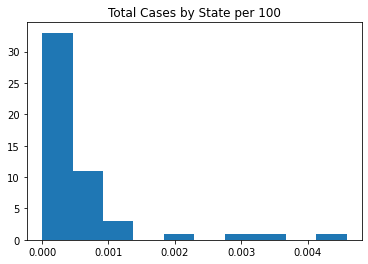

In [34]:
plt.figure(4)
plt.hist(state_total_df_agg_over_county["total_cases_per_cap_100"],bins=10)
plt.title("Total Cases by State per 100")
plt.show()

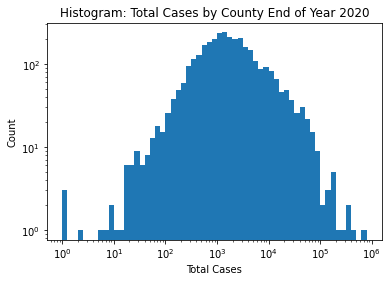

In [56]:
plt.figure(4)
bins = 10**np.arange(0,6,0.1)
plt.hist(state_total_df[state_total_df["cases"] > 0]["cases"],bins=bins)
plt.title("Histogram: Total Cases by County End of Year 2020")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Count")
plt.xlabel("Total Cases")
plt.savefig("total_cases_histogram_by_county.png")
plt.show()

In [43]:
state_total_df["cases"].max()

770915

In [50]:
bins = 10**np.arange(0,6,0.1)
bins

array([1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
       2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
       6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
       1.58489319e+01, 1.99526231e+01, 2.51188643e+01, 3.16227766e+01,
       3.98107171e+01, 5.01187234e+01, 6.30957344e+01, 7.94328235e+01,
       1.00000000e+02, 1.25892541e+02, 1.58489319e+02, 1.99526231e+02,
       2.51188643e+02, 3.16227766e+02, 3.98107171e+02, 5.01187234e+02,
       6.30957344e+02, 7.94328235e+02, 1.00000000e+03, 1.25892541e+03,
       1.58489319e+03, 1.99526231e+03, 2.51188643e+03, 3.16227766e+03,
       3.98107171e+03, 5.01187234e+03, 6.30957344e+03, 7.94328235e+03,
       1.00000000e+04, 1.25892541e+04, 1.58489319e+04, 1.99526231e+04,
       2.51188643e+04, 3.16227766e+04, 3.98107171e+04, 5.01187234e+04,
       6.30957344e+04, 7.94328235e+04, 1.00000000e+05, 1.25892541e+05,
       1.58489319e+05, 1.99526231e+05, 2.51188643e+05, 3.16227766e+05,
      

In [57]:
population_df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019
0,40,3,6,1,0,Alabama,Alabama,4903185
1,50,3,6,1,1,Alabama,Autauga County,55869
2,50,3,6,1,3,Alabama,Baldwin County,223234
3,50,3,6,1,5,Alabama,Barbour County,24686
4,50,3,6,1,7,Alabama,Bibb County,22394
...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,42343
3189,50,4,8,56,39,Wyoming,Teton County,23464
3190,50,4,8,56,41,Wyoming,Uinta County,20226
3191,50,4,8,56,43,Wyoming,Washakie County,7805
